## BiSSe - Binary State Speciation and Extinction

The model described is a Birth-Death model with two interacting species and the possibility of transitions between them. This model captures the dynamics of two species populations over time, incorporating birth, death, and transition rates.

### Parameters
- **$\lambda_1, \lambda_2$**: Birth rates of species 1 and species 2, respectively.
- **$\mu_1, \mu_2$**: Death rates of species 1 and species 2, respectively.
- **$p_{12}, p_{21}$**: Transition rates from species 1 to species 2 and from species 2 to species 1, respectively.
- **$ini_1, ini_2$**: Initial populations of species 1 and species 2, respectively.
- **$T$**: Maximum time for the simulation.

### Model Dynamics
1. **Initialization**: The initial populations of species 1 and species 2 are set based on the given parameters `ini1` and `ini2`. The current time is initialized to zero.

2. **Event Simulation**: The process continues in a loop until the current time exceeds the maximum time `T` or both species' populations become zero.

    - **Total Rate Calculation**: At each step, the total rate of events is calculated as the sum of all possible events' rates:
      
      $$
      \text{total\_rate} = n_1(\lambda_1 + \mu_1 + p_{12}) + n_2(\lambda_2 + \mu_2 + p_{21})
      $$

      where $n_1$ and $n_2$ are the current populations of species 1 and species 2, respectively.
    
    - **Event Time Sampling**: The time until the next event is sampled from an exponential distribution with the rate parameter `total_rate`.
    
    - **Event Type Sampling**: The type of event is determined by sampling from a discrete distribution with probabilities proportional to the rates of each event:

      $$
      \text{event\_probs} = \left[\frac{n_1 \lambda_1}{\text{total\_rate}}, \frac{n_2 \lambda_2}{\text{total\_rate}}, \frac{n_1 \mu_1}{\text{total\_rate}}, \frac{n_2 \mu_2}{\text{total\_rate}}, \frac{n_1 p_{12}}{\text{total\_rate}}, \frac{n_2 p_{21}}{\text{total\_rate}}\right]
      $$
    
    - **Event Execution**: Based on the sampled event type, the populations are updated accordingly:
        - **Birth of species 1**: $(n_1 \leftarrow n_1 + 1)$
        - **Birth of species 2**: $(n_2 \leftarrow n_2 + 1)$
        - **Death of species 1**: $(n_1 \leftarrow n_1 - 1)$
        - **Death of species 2**: $(n_2 \leftarrow n_2 - 1)$
        - **Transition from species 1 to species 2**: $(n_1 \leftarrow n_1 - 1), (n_2 \leftarrow n_2 + 1)$
        - **Transition from species 2 to species 1**: $(n_2 \leftarrow n_2 - 1), (n_1 \leftarrow n_1 + 1)$
    
    - **Event Recording**: Each event, along with the current time and updated populations, is recorded.

3. **Termination**: The process stops when the current time exceeds the maximum time `T` or both species' populations reach zero.

### Output
The function returns a list of events, each represented as a tuple `(time, n1, n2)`, where `time` is the time of the event, and `n1` and `n2` are the populations of species 1 and species 2 after the event.



$$
\text{total\_rate} = n_1(\lambda_1 + \mu_1 + p_{12}) + n_2(\lambda_2 + \mu_2 + p_{21})
$$


In [15]:
import numpy as np

def bisse(lam1, lam2, mu1, mu2, p12, p21, ini1, ini2, T):

    n1 = ini1.copy()
    n2 = ini2.copy()
    current_time = 0
    events = []
    events_list = np.array([1,2,3,4,5,6])

    while current_time < T:

        total_population = n1 + n2
        if total_population == 0:
            break

        total_rate  = n1*(lam1+mu1+p12) + n2*(lam2+mu2+p21)
        sampled_time = np.random.exponential(1/total_rate)
        current_time += sampled_time

        if current_time > T:
            break

        event_probs = np.array([n1*lam1, n2*lam2, n1*mu1, n2*mu2, n1*p12, n2*p21])/total_rate
        event = np.random.choice(events_list, p=event_probs)

        match event:
            case 1: # specie 1 gives birth
                n1 += 1
            case 2: # specie 2 gives birth
                n2 += 1
            case 3: # specie 1 dies
                n1 -= 1
            case 4: # specie 2 dies
                n2 -= 1 
            case 5: # specie 1 transitions to specie 2
                n1 -= 1
                n2 += 1
            case 6: # specie 2 transitions to specie 1
                n2 -= 1
                n1 += 1
            case _:
                raise ValueError("Invalid event")

        events.append((current_time, n1, n2))
        
    return events

### We randomize the paramaters and make an experiment by computing BiSSe and then ploting the evolution of the species over time

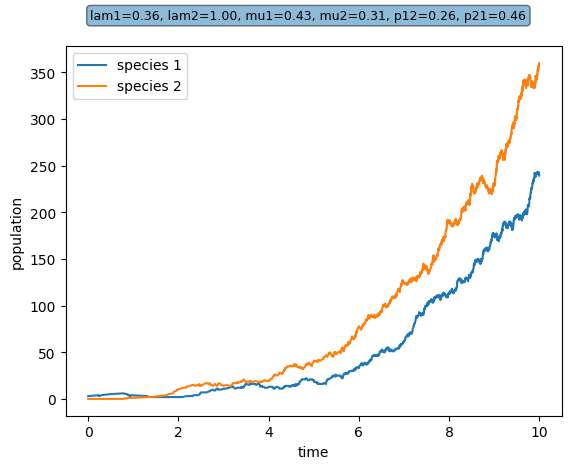

In [16]:
# parameters
lam1, lam2 = np.random.uniform(0, 1, size=2)
mu1, mu2 = np.random.uniform(0, 0.8, size=2)
p12, p21 = np.random.uniform(0, 0.5, size=2)
max_time = 10
max_num_initial_population = 5
ini1, ini2 = np.random.randint(0, max_num_initial_population, size=2)

events = bisse(lam1, lam2, mu1, mu2, p12, p21, ini1, ini2, max_time)
nodes = [(0, ini1, ini2)] + events

# plot each of the species in the same figure
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([node[0] for node in nodes], [node[1] for node in nodes], label='species 1')
ax.plot([node[0] for node in nodes], [node[2] for node in nodes], label='species 2')
ax.set_xlabel('time')
ax.set_ylabel('population')
rates_info = f'lam1={lam1:.2f}, lam2={lam2:.2f}, mu1={mu1:.2f}, mu2={mu2:.2f}, p12={p12:.2f}, p21={p21:.2f}'
ax.text(0.05, 1.1, rates_info, transform=ax.transAxes, fontsize=9, verticalalignment='top', bbox=dict(boxstyle="round", alpha=0.5))
ax.legend()
plt.show()


## Function Description

The `generate_data` function simulates the dynamics of two interacting species over multiple iterations and collects the resulting data. This function leverages the Birth-Death model with transition rates between the species to generate the data points.

### Parameters
- **num_data_points**: The number of data points to generate.
- **max_lamb_rate**: The maximum value for the birth rates $\lambda_1$ and $\lambda_2$.
- **max_mniu_rate**: The maximum value for the death rates $\mu_1$ and $\mu_2$.
- **max_num_initial_population**: The maximum initial population size for both species.
- **max_time**: The maximum simulation time for each iteration.

### Function Dynamics
1. **Initialization**: Two empty lists, `X` and `Y`, are created to store the input parameters and the resulting populations, respectively.

2. **Loop through Data Points**: For each data point:
    - Randomly sample birth rates $\lambda_1$ and $\lambda_2$ from a uniform distribution between 0 and `max_lamb_rate`.
    - Randomly sample death rates $\mu_1$ and $\mu_2$ from a uniform distribution between 0 and `max_mniu_rate`.
    - Randomly sample transition rates $p_{12}$ and $p_{21}$ from a uniform distribution between 0 and 1.
    - Randomly sample a simulation time `time` from a uniform distribution between 0 and `max_time`.
    - Randomly sample initial populations `ini1` and `ini2` from an integer uniform distribution between 0 and `max_num_initial_population`.
    
3. **Simulation**: For each set of sampled parameters, the `bisse` function is called to simulate the population dynamics over the sampled time period.

4. **Event Recording**: The populations of species 1 and species 2 at the end of the simulation are recorded. If no events occurred during the simulation, the initial populations are used.

5. **Data Collection**: The sampled parameters and the resulting populations are appended to the lists `X` and `Y`.

6. **Return Values**: The function returns two NumPy arrays, `X` and `Y`, where `X` contains the input parameters for each data point and `Y` contains the resulting populations of species 1 and species 2.

In [65]:
from tqdm.notebook import tqdm

def generate_data(num_data_points, max_lamb_rate, max_mniu_rate, max_num_initial_population, max_time):
    X = []
    Y = []
    
    for _ in tqdm(range(num_data_points)):
        lam1, lam2 = np.random.uniform(0, max_lamb_rate, size=2)
        mu1, mu2 = np.random.uniform(0, max_mniu_rate, size=2)
        p12, p21 = np.random.uniform(0, 1, size=2)
        time = np.random.uniform(0, max_time)
        ini1, ini2 = np.random.randint(0, max_num_initial_population, size=2)

        events = bisse(lam1, lam2, mu1, mu2, p12, p21, ini1, ini2, time)

        _, num_specie1, num_specie2 = (0, ini1, ini2) if len(events) == 0 else events[-1]

        X.append([lam1, lam2, mu1, mu2, p12, p21, ini1, ini2])
        Y.append([num_specie1, num_specie2])

    return np.array(X), np.array(Y)

  0%|          | 0/80000 [00:00<?, ?it/s]

## Data Generation and Splitting

### Data Generation
The data generation process involves simulating the dynamics of two interacting species over a large number of iterations using the `generate_data` function. The parameters for this process are as follows:

- **num_data_points**: $(64 \times 1250)$
- **max_lamb_rate**: 1
- **max_mniu_rate**: 1
- **max_num_initial_population**: 5
- **max_time**: 10

The function `generate_data` is called with these parameters to produce the input data `X` and the corresponding output data `Y`.

Note:
- We consider a small time frame of max time 10 because if sampled lambdas are substantially greater than the sampled mnius, then the growth of the population is exponential and this will become computationally unfeasible.

In [66]:
num_data_points = 64*1250
max_lamb_rate = 1
max_mniu_rate = 1
max_num_initial_population = 5
max_time = 10

X, Y = generate_data(num_data_points, max_lamb_rate, max_mniu_rate, max_num_initial_population, max_time)

idx = np.random.permutation(num_data_points)
X = X[idx]
Y = Y[idx]

test_cut_idx = int(0.9*num_data_points)

X_train, Y_train, X_test, Y_test = X[:test_cut_idx], Y[:test_cut_idx], X[test_cut_idx:], Y[test_cut_idx:]

val_cut_idx = int(0.8*test_cut_idx)
X_train, Y_train, X_val, Y_val = X_train[:val_cut_idx], Y_train[:val_cut_idx], X_train[val_cut_idx:], Y_train[val_cut_idx:]

## Neural Network Model Training and Visualization

### Neural Network Model Architecture
The code defines a neural network model using TensorFlow's Keras API. The model architecture consists of:
- **Input Layer**: Defined by the shape of `X_train[0]`, which corresponds to the shape of the input data.
- **Dense Layers**: Four hidden layers with 16, 26, 18, and 8 neurons respectively, each using ReLU (Rectified Linear Unit) activation function.
- **Output Layer**: An output layer with neurons equal to the number of outputs (`Y_train[0].shape[0]`), which predicts the populations of species 1 and species 2.

### Callback
- **Early Stopping**: A callback (`ea_callback`) is used to monitor the validation loss (`val_loss`). Training will stop early if the validation loss does not improve for 5 consecutive epochs (`patience=5`). The model will restore the weights that give the best validation loss (`restore_best_weights=True`).

### Model Compilation
The model is compiled using the Adam optimizer (`optimizer='adam'`) and mean squared error (`loss='mse'`) as the loss function. The accuracy metric is used for evaluation (`metrics=['accuracy']`).

### Model Training
The `model.fit` method is called to train the model:
- **X_train, Y_train**: Training data and labels.
- **epochs**: Number of epochs set to 25.
- **batch_size**: Batch size set to 32.
- **validation_data**: Validation data and labels provided as `(X_val, Y_val)`.
- **callbacks**: Early stopping callback (`ea_callback`) is passed to monitor validation loss during training.

### Training History Visualization
After training, the accuracy and validation accuracy over epochs are plotted using Matplotlib to visualize the model's performance.



Epoch 1/25
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 393us/step - accuracy: 0.5299 - loss: 108797.1328 - val_accuracy: 0.3701 - val_loss: 79455.8125
Epoch 2/25
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 353us/step - accuracy: 0.4152 - loss: 111571.3828 - val_accuracy: 0.3137 - val_loss: 78754.3828
Epoch 3/25
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 351us/step - accuracy: 0.5199 - loss: 76855.4766 - val_accuracy: 0.6885 - val_loss: 78384.6641
Epoch 4/25
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.6344 - loss: 98268.1719 - val_accuracy: 0.6074 - val_loss: 78251.6953
Epoch 5/25
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 353us/step - accuracy: 0.6247 - loss: 82009.6328 - val_accuracy: 0.6308 - val_loss: 78215.0938
Epoch 6/25
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 354us/step - accuracy: 0.6315 - loss: 105668.6641 - val_accuracy: 0.6057 - val_loss: 79659.9766
Epoch 7/25
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step - accuracy: 0.6531 - loss: 110008.5469 - val_accuracy: 0.7122 - val_loss: 78386.0859
Epoch 8/25
1800/

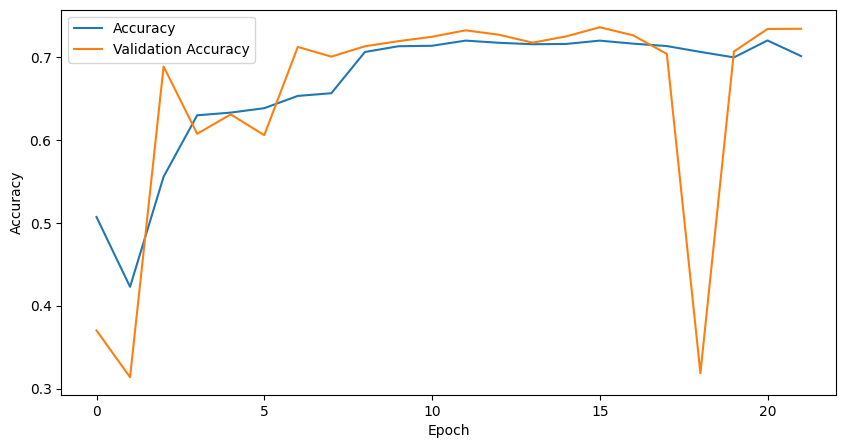

In [108]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(X_train[0].shape), 
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(26, activation='relu'),
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(Y_train[0].shape[0])
])

ea_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=25, batch_size=32, validation_data=(X_val, Y_val), callbacks=[ea_callback])

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Model Evaluation on Test Data

### Model Evaluation
To evaluate the trained neural network model on the test data (`X_test` and `Y_test`), the `model.evaluate` method is used. This method computes the loss and metrics (accuracy in this case) on the test set.

In [109]:
cost, acc = model.evaluate(X_test, Y_test)
print(f'Test accuracy: {acc:.3f}')

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.7290 - loss: 26223.7441
Test accuracy: 0.722


### Saving the model

We can observe that our current model has an accuracy of 72.2% on the test set. In other words, given a vector space of parameters within the bounds previously defined, we can predict the number of of each species with an accuracy of 72.2%. We can proceed and save the model for future use.



In [110]:
# save the model
model.save('bisse_model.keras')